# Lab 5

Build KNN Classification model for a given dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


Build a KNN classifier to classify IRIS flower dataset. Choose appropriate k
value and predict the score ,display confusion matrix and classification report.
Use 80% of data for training and 20% for testing. Display accuracy score and
confusion matrix of the trained model on test data.

Accuracy Score: 1.0 

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 



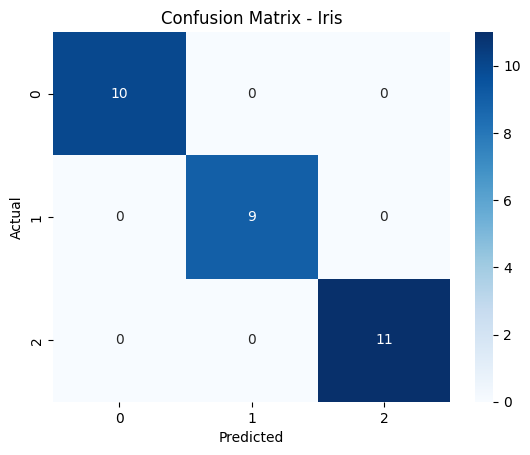

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
iris_df = pd.read_csv("iris.csv")

# Encode categorical target labels
le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['species'])

# Split features and labels
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train, y_train)

# Predict
y_pred = knn_iris.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred),"\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),"\n")
print("Classification Report:\n", classification_report(y_test, y_pred),"\n")

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Iris")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Build a KNN classifier to classify diabetes dataset. Choose k value and
perform feature scaling. Use 80% of data for training and 20% for testing.
Display accuracy score and confusion matrix of the trained model on test data.

Accuracy Score: 0.6883116883116883 

Confusion Matrix:
 [[79 20]
 [28 27]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154
 



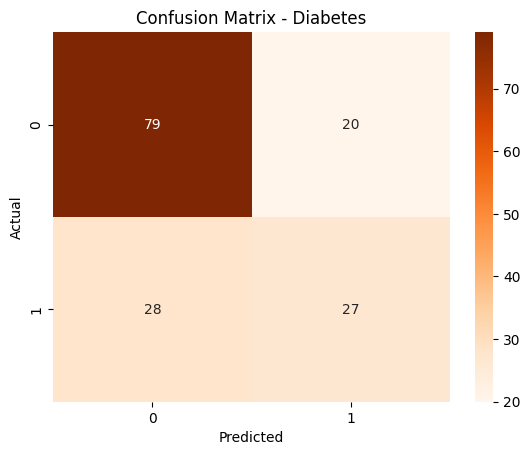

In [ ]:
from sklearn.preprocessing import StandardScaler

# Load the dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Features and labels
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train KNN
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train, y_train)

# Predict
y_pred = knn_diabetes.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred),"\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),"\n")
print("Classification Report:\n", classification_report(y_test, y_pred),"\n")

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Oranges", fmt="d")
plt.title("Confusion Matrix - Diabetes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Using heart.csv dataset and do following-

Classify the target using KNN classifier. You can use different values
for k neighbors and need to figure out a value of K that gives you a
maximum score.

Plot confusion matrix

Plot classification report

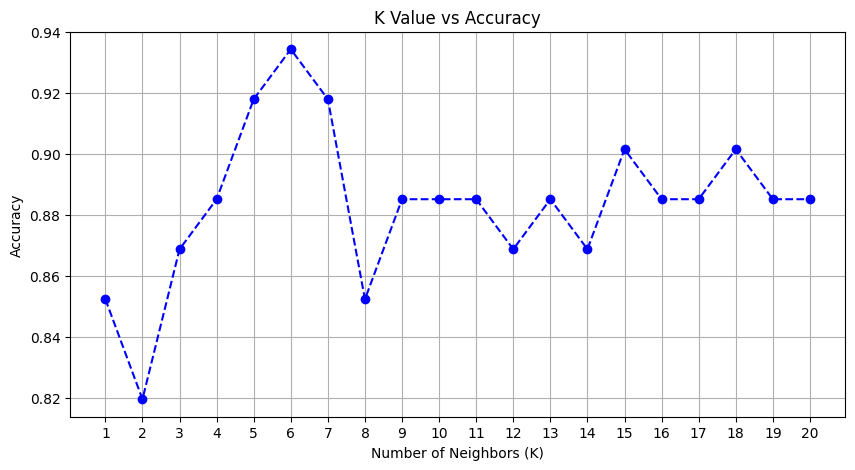


Best K Value: 6 with Accuracy: 0.9344


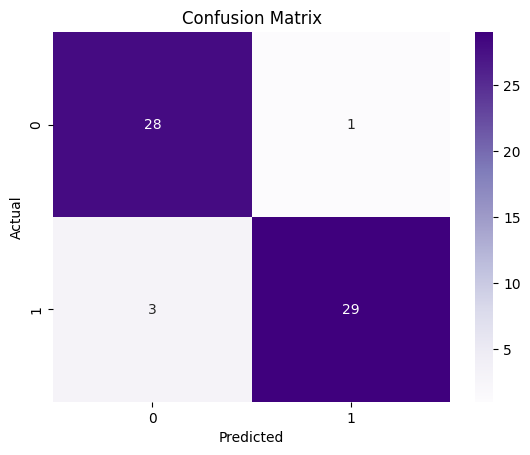

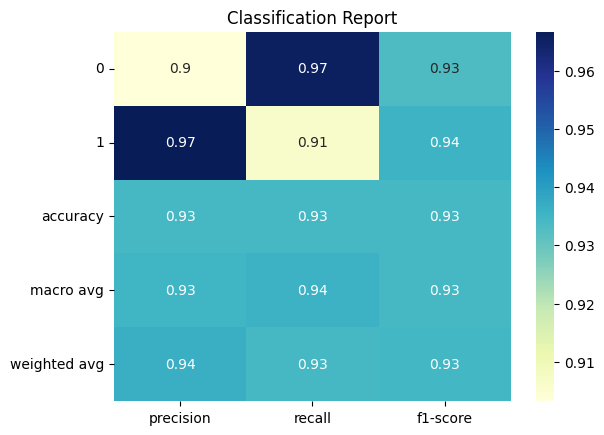

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("heart.csv")

# Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the best k value
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title("K Value vs Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K Value: {best_k} with Accuracy: {max(accuracy_scores):.4f}")

# Final model using best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Purples", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.show()